In [2]:
def draw_heatmap(image_path):
    # 打开图片并获取其宽度和高度
    img = Image.open(image_path)
    width, height = img.size

    # 初始化二维数组
    green_intensity = np.zeros((height, width))

    # 遍历每个像素
    for i in range(height):
        for j in range(width):
            pixel = img.getpixel((j, i))
            r, g, b, a = pixel  # 获取RGBA值
            # 如果像素是绿色，就增加计数
            if g > r and g > b:
                green_intensity[i][j] = g * (a / 255.0)  # 考虑透明度

    # 绘制热图
    plt.imshow(green_intensity, cmap='inferno', interpolation='nearest')
    plt.colorbar()  # 显示颜色条
    plt.axis('off')
    plt.show()

# 使用函数
draw_heatmap('/Users/yanyu/Desktop/课题组文章/金晓强老师/纵向生长/图片 1.png')

NameError: name 'Image' is not defined

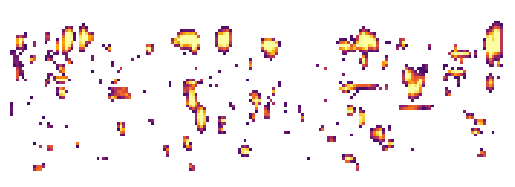

In [5]:
import matplotlib.colors as mcolors
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def draw_heatmap(image_path, threshold):
    # 打开图片并获取其宽度和高度
    img = Image.open(image_path)
    width, height = img.size

    # 初始化二维数组
    green_intensity = np.zeros((height, width))

    # 遍历每个像素
    for i in range(height):
        for j in range(width):
            pixel = img.getpixel((j, i))
            r, g, b, a = pixel  # 获取RGBA值
            # 如果像素是绿色，就增加计数
            if g > r and g > b:
                green_intensity[i][j] = g * (a / 255.0)  # 考虑透明度

    # 创建一个新的数组，将低于阈值的点设置为0
    filtered_intensity = np.where(green_intensity >= threshold, green_intensity, 0)

    # 创建一个新的colormap，将0值（低于阈值的点）设置为透明
    colors = [(0,0,0,0)] + [(plt.cm.inferno(i)) for i in range(1,256)]
    new_cmap = mcolors.LinearSegmentedColormap.from_list('new_cmap', colors, N=256)

    # 绘制热图
    plt.imshow(filtered_intensity, cmap=new_cmap, interpolation='nearest')
    #plt.colorbar()  # 显示颜色条
    plt.axis('off')
    plt.show()

# 使用函数
draw_heatmap('/Users/yanyu/Desktop/课题组文章/金晓强老师/纵向生长/800-1.png', threshold=50)

TypeError: Invalid shape (443,) for image data

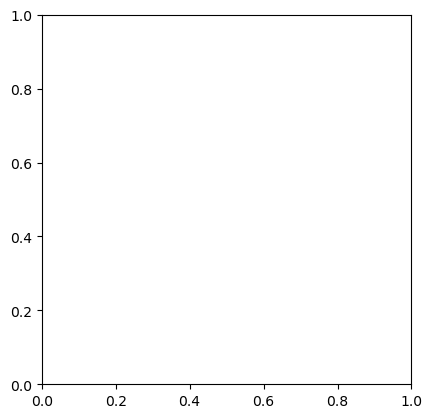

In [ ]:
def draw_heatmap(image_path, threshold):
    # 打开图片并获取其宽度和高度
    img = Image.open(image_path)
    width, height = img.size

    # 初始化二维数组
    green_intensity = np.zeros((height, width))

    # 遍历每个像素
    for i in range(height):
        for j in range(width):
            pixel = img.getpixel((j, i))
            r, g, b, a = pixel  # 获取RGBA值
            # 如果像素是绿色，就增加计数
            if g > r and g > b:
                green_intensity[i][j] = g * (a / 255.0)  # 考虑透明度

    # 过滤掉低于阈值的点
    green_intensity = green_intensity[green_intensity >= threshold]

    # 绘制热图
    plt.imshow(green_intensity, cmap='inferno', interpolation='nearest')
    plt.colorbar()  # 显示颜色条
    plt.axis('off')
    plt.show()

# 使用函数
draw_heatmap('/Users/yanyu/Desktop/课题组文章/金晓强老师/纵向生长/图片 1.png', threshold=100)

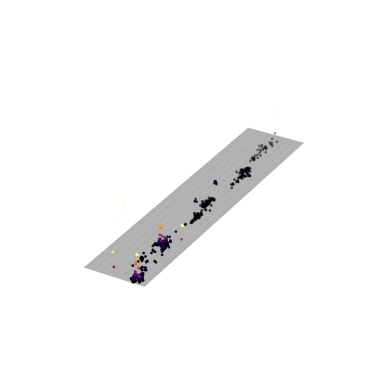

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 读取图片
img = plt.imread('/Users/yanyu/Desktop/课题组文章/金晓强老师/纵向生长/图片 4.png')

# 获取图片的宽度和高度
height, width = img.shape[:2]

# 创建一个空的3D数组
data = np.zeros((height, width, 3))

# 遍历图像的每个像素
for y in range(height):
    for x in range(width):
        # 将像素的x，y坐标和绿色通道的值作为z值存储到3D数组中
        data[y, x] = [x, y, img[y, x, 1]* 50]

# 设置阈值
threshold = 3

# 创建一个3D散点图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 过滤掉z轴值小于阈值的点
mask = data[:,:,2] >= threshold

ax.scatter(data[mask,0], data[mask,1], data[mask,2], c=data[mask,2], cmap='inferno',s=1)

# 创建z轴平面
x = np.linspace(0, width, num=10)
y = np.linspace(0, height, num=10)
x, y = np.meshgrid(x, y)
z = np.full_like(x, threshold)
ax.plot_surface(x, y, z, alpha=0.5, color='gray')
                
# 设置x和y轴的比例相等
ax.set_box_aspect([np.ptp(data[mask,0]), np.ptp(data[mask,1]), np.ptp(data[mask,2])])
ax.set_axis_off()

# 显示图像
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/7l/nk2j59393dq7lf06cn0hx2w00000gn/T/ipykernel_52072/2407184275.py:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/var/folders/7l/nk2j59393dq7lf06cn0hx2w00000gn/T/ipykernel_52072/2407184275.py:30: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_bottom, pcov_bottom = curve_fit(func, bottom_points[:, 0], bottom_points[:, 1])


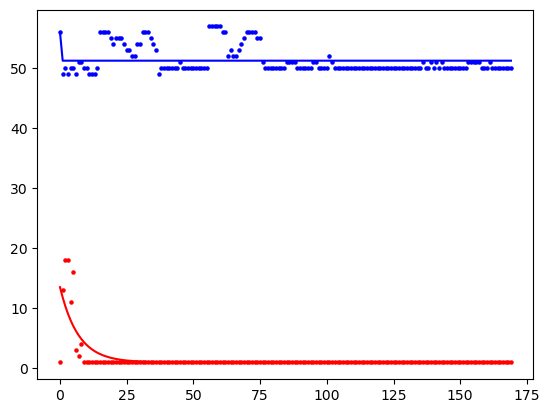

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

def process_image(image_path):
    img = Image.open(image_path)
    width, height = img.size
    img = np.array(img)

    # 找到每一列中色块的最高点和最低点
    top_points = []
    bottom_points = []
    for i in range(width):
        column = img[:, i, 1]  # 取绿色通道
        non_zero_indices = np.nonzero(column)
        if non_zero_indices[0].size != 0:
            top_points.append((i, non_zero_indices[0][0]))
            bottom_points.append((i, non_zero_indices[0][-1]))

    # 将点的列表转换为numpy数组
    top_points = np.array(top_points)
    bottom_points = np.array(bottom_points)

    # 拟合曲线
    popt_top, pcov_top = curve_fit(func, top_points[:, 0], top_points[:, 1])
    popt_bottom, pcov_bottom = curve_fit(func, bottom_points[:, 0], bottom_points[:, 1])

    # 绘制原始点和拟合的曲线
    plt.scatter(top_points[:, 0], top_points[:, 1], s=5, color='red')
    plt.plot(top_points[:, 0], func(top_points[:, 0], *popt_top), 'r-')
    plt.scatter(bottom_points[:, 0], bottom_points[:, 1], s=5, color='blue')
    plt.plot(bottom_points[:, 0], func(bottom_points[:, 0], *popt_bottom), 'b-')
    plt.show()

# 使用函数
process_image('/Users/yanyu/Desktop/课题组文章/金晓强老师/纵向生长/800-2.png')

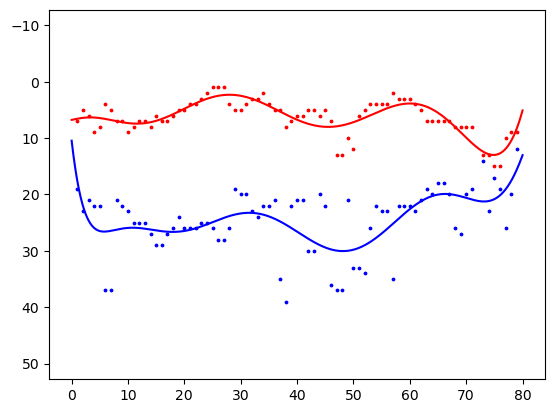

In [ ]:
def process_image(image_path, threshold, x_range=None):
    img = Image.open(image_path)
    width, height = img.size
    img = np.array(img)

    # 设置阈值
    img[img[:, :, 1] < threshold] = 0

    # 找到每一列中色块的最高点和最低点
    top_points = []
    bottom_points = []
    for i in range(width):
        column = img[:, i, 1]  # 取绿色通道
        non_zero_indices = np.nonzero(column)
        if non_zero_indices[0].size != 0:
            top_points.append((i, non_zero_indices[0][0]))
            bottom_points.append((i, non_zero_indices[0][-1]))

    # 将点的列表转换为numpy数组
    top_points = np.array(top_points)
    bottom_points = np.array(bottom_points)

    # 拟合曲线
    poly_top = np.polyfit(top_points[:, 0], top_points[:, 1], 10)
    poly_bottom = np.polyfit(bottom_points[:, 0], bottom_points[:, 1], 10)

    # 创建多项式函数
    poly_top_func = np.poly1d(poly_top)
    poly_bottom_func = np.poly1d(poly_bottom)

    # 绘制拟合的曲线
    if x_range is None:
        x = np.linspace(0, width, 1000)
    else:
        x = np.linspace(x_range[0], x_range[1], 1000)
    plt.plot(x, poly_top_func(x), 'r-')
    plt.plot(x, poly_bottom_func(x), 'b-')

    # 绘制点
    plt.scatter(top_points[:, 0], top_points[:, 1], color='red',s=3)
    plt.scatter(bottom_points[:, 0], bottom_points[:, 1], color='blue',s=3)

    plt.axis('equal')  # 设置x轴和y轴的比例相同
    plt.gca().invert_yaxis()
    plt.show()

# 使用函数
process_image('/Users/yanyu/Desktop/课题组文章/金晓强老师/纵向生长/400-1.png', threshold=50, x_range=(0, 80))

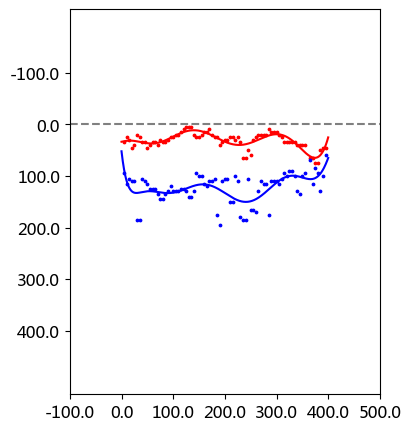

In [2]:


def process_image(image_path, threshold, x_range=None, y_range=None):
    img = Image.open(image_path)
    width, height = img.size
    img = np.array(img)

    # 设置阈值
    img[img[:, :, 1] < threshold] = 0

    # 找到每一列中色块的最高点和最低点
    top_points = []
    bottom_points = []
    for i in range(width):
        column = img[:, i, 1]  # 取绿色通道
        non_zero_indices = np.nonzero(column)
        if non_zero_indices[0].size != 0:
            top_points.append((i, non_zero_indices[0][0]))
            bottom_points.append((i, non_zero_indices[0][-1]))

    # 将点的列表转换为numpy数组
    top_points = np.array(top_points)
    bottom_points = np.array(bottom_points)

    # 拟合曲线
    poly_top = np.polyfit(top_points[:, 0], top_points[:, 1], 10)
    poly_bottom = np.polyfit(bottom_points[:, 0], bottom_points[:, 1], 10)

    # 创建多项式函数
    poly_top_func = np.poly1d(poly_top)
    poly_bottom_func = np.poly1d(poly_bottom)

    # 设置图形的大小
    if x_range is not None and y_range is not None:
        fig_width = abs(x_range[1] - x_range[0]) / 20  # 假设每20个像素为1英寸
        fig_height = abs(y_range[1] - y_range[0]) / 20
        plt.figure(figsize=(fig_width, fig_height))

    # 绘制拟合的曲线
    if x_range is None:
        x = np.linspace(0, width, 1000)
    else:
        x = np.linspace(x_range[0], x_range[1], 1000)
    plt.plot(x, poly_top_func(x), 'r-')
    plt.plot(x, poly_bottom_func(x), 'b-')

    # 绘制点
    plt.scatter(top_points[:, 0], top_points[:, 1], color='red',s=3)
    plt.scatter(bottom_points[:, 0], bottom_points[:, 1], color='blue',s=3)

    # 在y=0处添加一条灰色的虚线
    plt.axhline(0, color='gray', linestyle='--')

    plt.axis('equal')  # 设置x轴和y轴的比例相同
    if y_range is not None:
        plt.ylim(y_range[1], y_range[0])  # 注意这里的顺序，因为图片的y轴是反向的
    
       # 获取当前的刻度，并将它们乘以5
    x_ticks = plt.xticks()[0]
    y_ticks = plt.yticks()[0]
    plt.xticks(x_ticks, x_ticks * 5)
    plt.yticks(y_ticks, y_ticks * 5)


    plt.show()

# 使用函数
process_image('/Users/yanyu/Desktop/课题组文章/金晓强老师/纵向生长/400-1.png', threshold=50, x_range=(0, 80), y_range=(-20,80))

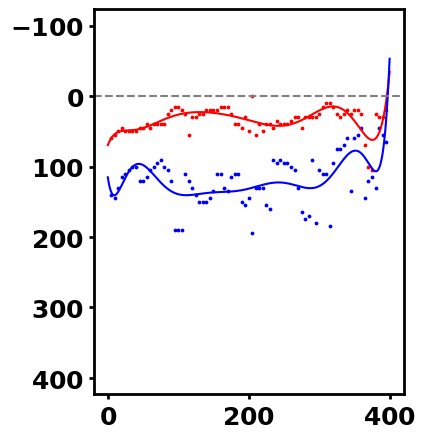

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 设置字体样式
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['font.size'] = 18  # 设置字体大小


# 创建一个格式化函数，将浮点数转换为整数，并设置字体为粗体
def format_func(value, tick_number):
    return r"$\bf{" + str(int(value) * 5) + "}$"

# 创建一个FuncFormatter对象
formatter = ticker.FuncFormatter(format_func)



def process_image(image_path, threshold, x_range=None, y_range=None):
    img = Image.open(image_path)
    width, height = img.size
    img = np.array(img)

    
    # 设置阈值
    img[img[:, :, 1] < threshold] = 0

    # 找到每一列中色块的最高点和最低点
    top_points = []
    bottom_points = []
    for i in range(width):
        column = img[:, i, 1]  # 取绿色通道
        non_zero_indices = np.nonzero(column)
        if non_zero_indices[0].size != 0:
            top_points.append((i, non_zero_indices[0][0]))
            bottom_points.append((i, non_zero_indices[0][-1]))

    # 将点的列表转换为numpy数组
    top_points = np.array(top_points)
    bottom_points = np.array(bottom_points)

    # 拟合曲线
    poly_top = np.polyfit(top_points[:, 0], top_points[:, 1], 10)
    poly_bottom = np.polyfit(bottom_points[:, 0], bottom_points[:, 1], 10)

    # 创建多项式函数
    poly_top_func = np.poly1d(poly_top)
    poly_bottom_func = np.poly1d(poly_bottom)

    # 设置图形的大小
    if x_range is not None and y_range is not None:
        fig_width = abs(x_range[1] - x_range[0]) / 20  # 假设每20个像素为1英寸
        fig_height = abs(y_range[1] - y_range[0]) / 20
        plt.figure(figsize=(fig_width, fig_height))

    # 绘制拟合的曲线
    if x_range is None:
        x = np.linspace(0, width, 1000)
    else:
        x = np.linspace(x_range[0], x_range[1], 1000)
    plt.plot(x, poly_top_func(x), 'r-')
    plt.plot(x, poly_bottom_func(x), 'b-')

    # 绘制点
    plt.scatter(top_points[:, 0], top_points[:, 1], color='red',s=3)
    plt.scatter(bottom_points[:, 0], bottom_points[:, 1], color='blue',s=3)

    # 在y=0处添加一条灰色的虚线
    plt.axhline(0, color='gray', linestyle='--')

    plt.axis('equal')  # 设置x轴和y轴的比例相同
    if y_range is not None:
        plt.ylim(y_range[1], y_range[0])  # 注意这里的顺序，因为图片的y轴是反向的
    
    x_ticks = np.arange(0, plt.xlim()[1], 40)
    y_ticks = plt.yticks()[0]
    plt.xticks(x_ticks, x_ticks )
    plt.yticks(y_ticks, y_ticks )
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gca().yaxis.set_major_formatter(formatter)
    # 设置x轴和y轴的刻度线粗细
    plt.gca().xaxis.set_tick_params(width=2)
    plt.gca().yaxis.set_tick_params(width=2)

    # 加粗边框
    for axis in ['top','bottom','left','right']:
        plt.gca().spines[axis].set_linewidth(2)

    plt.show()

process_image('/Users/yanyu/Desktop/课题组文章/金晓强老师/纵向生长/400-2.png', threshold=50, x_range=(0, 80), y_range=(-20,80))